<a href="https://colab.research.google.com/github/201ssc/kaggle_test/blob/main/kaggle_titanic_test5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [165]:
import numpy as np
import pandas as pd
from pandas import Series
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5)

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/titanic/test.csv')
df_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/titanic/train.csv')

In [166]:
for col in df_train.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:   Survived	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.87%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 77.10%
column:   Embarked	 Percent of NaN value: 0.22%


In [167]:
for col in df_test.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 20.57%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.24%
column:      Cabin	 Percent of NaN value: 78.23%
column:   Embarked	 Percent of NaN value: 0.00%


In [168]:
df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

기본 값 정리, 연령 널값 제거, 티켓값 평탄화

# Fill Null in Age

In [137]:
# 취소 연령 평균값, 좀 더 정확히 하기

# df_test.loc[df_test.Age.isnull(), 'Age'] = round(df_test.Age.mean(), 2)
# df_train.loc[df_train.Age.isnull(), 'Age'] = round(df_train.Age.mean(), 2)

In [169]:
df_train['Initial'] = df_train.Name.str.extract('([A-Za-z]+)\.') # Lets extract the Salutations
df_test['Initial'] = df_test.Name.str.extract('([A-Za-z]+)\.') # Lets extract the Salutations

In [170]:
pd.crosstab(df_train['Initial'], df_train['Sex']).T.style.background_gradient(
	cmap='summer_r') # Checking the Initials with the Sex

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [ ]:
## 취소  
# 단순하게 만들어 평균값을 넣어 줬지만 비효율적이다. 
"""
1. 널이 아닌 값도 불필요한 계산이 들어간다.
2. 지나친 단순화로 인해 널값들이 부정확하게 들어 갈 수 있다. 

>> 차라리 널에 해당하는 값들을 살펴본뒤 그들에 평균을 직접 넣는 것이 더 바람직하다.

df_train['Initial'].replace(['Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer',
	'Col', 'Rev', 'Capt', 'Sir', 'Don', 'Dona'],
    	['Miss', 'Miss', 'Miss', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Other', 'Other', 'Other',
        'Mr', 'Mr', 'Mr', 'Mr'], inplace = Ture)
        
df_test['Initial'].replace(['Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer',
	'Col', 'Rev', 'Capt', 'Sir', 'Don', 'Dona'],
    	['Miss', 'Miss', 'Miss', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Other', 'Other', 'Other',
        'Mr', 'Mr', 'Mr', 'Mr'], inplace = Ture)


df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mr'),'Age'] = 33
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mrs'),'Age'] = 36
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Master'),'Age'] = 5
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Miss'),'Age'] = 22
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Other'),'Age'] = 46

# test의 값은 train 값을 기준으로 바꿔줍시다.
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mr'),'Age'] = 33
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mrs'),'Age'] = 36
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Master'),'Age'] = 5
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Miss'),'Age'] = 22
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Other'),'Age'] = 46

# df.loc['A', 'B']가 있다면
# 'A'는 행을 나타내고 'B'는 열(Label)을 나타냅니다.

"""

In [153]:
# 널값 찾기
pd.crosstab(df_train['Initial'], df_train['Age'].isnull()).T.style.background_gradient(
	cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Age,,,,,,,,,,,,,,,,,
False,1,2,1,1,6,1,1,2,36,146,2,1,398,108,1,6,1
True,0,0,0,0,1,0,0,0,4,36,0,0,119,17,0,0,0


In [154]:
pd.crosstab(df_test['Initial'], df_test['Age'].isnull()).T.style.background_gradient(
	cmap='summer_r')

Initial,Col,Dona,Dr,Master,Miss,Mr,Mrs,Ms,Rev
Age,,,,,,,,,
False,2,1,1,17,64,183,62,0,2
True,0,0,0,4,14,57,10,1,0


In [ ]:
널값은

df_train
"Dr", "Mastar", "Miss", "Mrs", "Mr"

df_test
Master	Miss	Mr	Mrs	Ms

In [171]:
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Dr'),'Age'] = df_train[df_train.Initial=='Dr']['Age'].mean()
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Master'),'Age'] = df_train[df_train.Initial=='Master']['Age'].mean()
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Miss'),'Age'] = df_train[df_train.Initial=='Miss']['Age'].mean()
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mrs'),'Age'] = df_train[df_train.Initial=='Mrs']['Age'].mean()
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mr'),'Age'] = df_train[df_train.Initial=='Mr']['Age'].mean()

In [172]:
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Master'),'Age'] = df_test[df_test.Initial=='Master']['Age'].mean()
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Miss'),'Age'] = df_test[df_test.Initial=='Miss']['Age'].mean()
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mr'),'Age'] = df_test[df_test.Initial=='Mr']['Age'].mean()
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mrs'),'Age'] = df_test[df_test.Initial=='Mrs']['Age'].mean()
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Ms'),'Age'] = df_train[df_train.Initial=='Ms']['Age'].mean()


In [ ]:
 df_train[df_train.Initial=='Mr']['Age'].mean()

In [173]:
pd.crosstab(df_train['Initial'], df_train['Age'].isnull()).T.style.background_gradient(
	cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Age,,,,,,,,,,,,,,,,,
False,1,2,1,1,7,1,1,2,40,182,2,1,517,125,1,6,1


In [174]:
pd.crosstab(df_test['Initial'], df_test['Age'].isnull()).T.style.background_gradient(
	cmap='summer_r')

Initial,Col,Dona,Dr,Master,Miss,Mr,Mrs,Ms,Rev
Age,,,,,,,,,
False,2,1,1,21,78,240,72,1,2


clear

# Fill Null in Embarked

In [175]:
print('Embarked has ', sum(df_train['Embarked'].isnull()), ' Null values')

Embarked has  2  Null values


In [176]:
df_train['Embarked'].fillna('S', inplace=True)

In [184]:
msg = 'Embarkedt// NaN value: {:.2f}%'.format( 100 * (df_train['Embarked'].isnull().sum() / df_train['Embarked'].shape[0]))
print(msg)

Embarkedt// NaN value: 0.00%


# Change Age(continuous to categorical)

In [186]:
 df_train['Age_cat'] = 0
df_train.loc[df_train['Age'] < 10, 'Age_cat'] = 0
df_train.loc[(10 <= df_train['Age']) & (df_train['Age'] < 20), 'Age_cat'] = 1
df_train.loc[(20 <= df_train['Age']) & (df_train['Age'] < 30), 'Age_cat'] = 2
df_train.loc[(30 <= df_train['Age']) & (df_train['Age'] < 40), 'Age_cat'] = 3
df_train.loc[(40 <= df_train['Age']) & (df_train['Age'] < 50), 'Age_cat'] = 4
df_train.loc[(50 <= df_train['Age']) & (df_train['Age'] < 60), 'Age_cat'] = 5
df_train.loc[(60 <= df_train['Age']) & (df_train['Age'] < 70), 'Age_cat'] = 6
df_train.loc[70 <= df_train['Age'], 'Age_cat'] = 7

df_test['Age_cat'] = 0
df_test.loc[df_test['Age'] < 10, 'Age_cat'] = 0
df_test.loc[(10 <= df_test['Age']) & (df_test['Age'] < 20), 'Age_cat'] = 1
df_test.loc[(20 <= df_test['Age']) & (df_test['Age'] < 30), 'Age_cat'] = 2
df_test.loc[(30 <= df_test['Age']) & (df_test['Age'] < 40), 'Age_cat'] = 3
df_test.loc[(40 <= df_test['Age']) & (df_test['Age'] < 50), 'Age_cat'] = 4
df_test.loc[(50 <= df_test['Age']) & (df_test['Age'] < 60), 'Age_cat'] = 5
df_test.loc[(60 <= df_test['Age']) & (df_test['Age'] < 70), 'Age_cat'] = 6
df_test.loc[70 <= df_test['Age'], 'Age_cat'] = 7

In [188]:
def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7

df_train['Age_cat_2'] = df_train['Age'].apply(category_age)

In [189]:
print('1번 방법, 2번 방법 둘 다 같은 결과를 내면 True를 줍니다. => ', (
	df_train['Age_cat'] == df_train['Age_cat_2']).all())

1번 방법, 2번 방법 둘 다 같은 결과를 내면 True를 줍니다. =>  True


In [190]:
df_train.drop(['Age', 'Age_cat_2'], axis = 1, inplace = True)
df_test.drop(['Age'], axis = 1, inplace = True)

# Change Initial, Embarked and Sex (string to numerical)

In [ ]:
df_train['Initial'] = df_train['Initial'].map({'Miss':0,'Mr':1,'Mrs':2,'Ms':3,'Master':4,'Col':5,'Dona':6,'Dr':7
                                               ,'Capt':7,'Countess':8,'Don':9,'Jonkheer':10,'Lady':11,'Major':12,'Mlle':13,'Mme':14
                                               ,'Rev':15,'Sir':16})
df_test['Initial'] = df_test['Initial'].map({'Miss':0,'Mr':1,'Mrs':2,'Ms':3,'Master':4,'Col':5,'Dona':6,'Dr':7})

In [192]:
df_train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [193]:
df_train['Embarked'] = df_train['Embarked'].map({'C':0, 'Q':1, 'S':2})
df_test['Embarked'] = df_test['Embarked'].map({'C':0, 'Q':1, 'S':2})

In [194]:
df_train['Embarked'].isnull().any()

False

In [195]:
df_train['Sex'] = df_train['Sex'].map({'female':0, 'male':1})
df_test['Sex'] = df_test['Sex'].map({'female':0, 'male':1})

In [197]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1

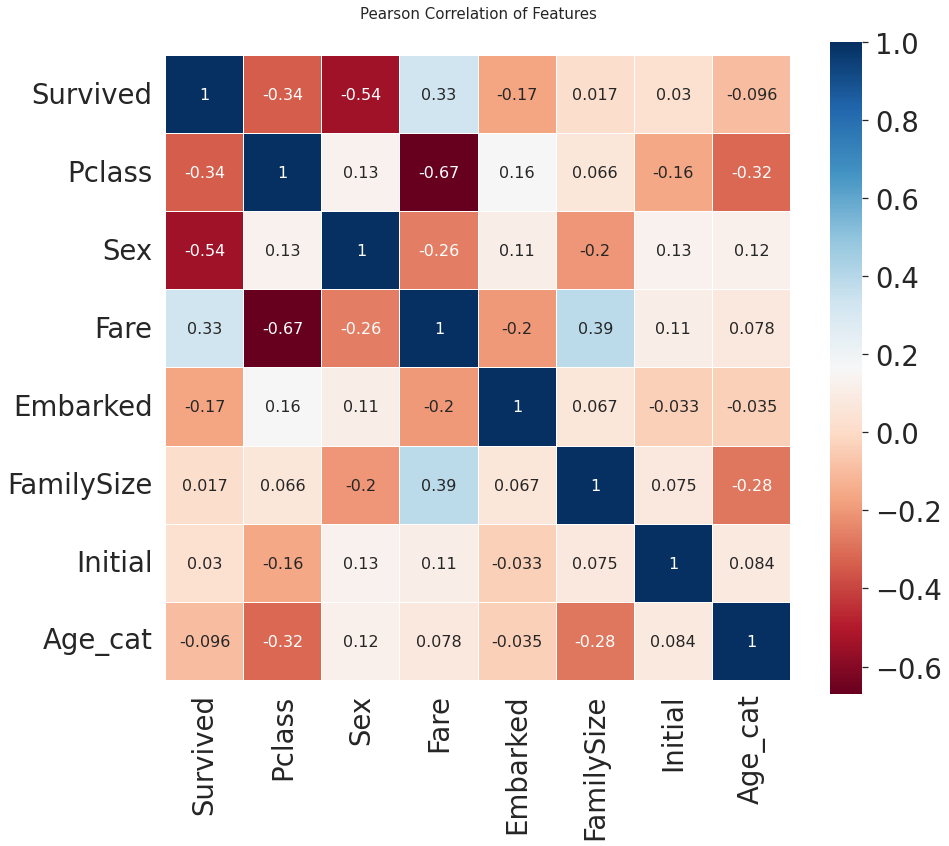

In [198]:
heatmap_data = df_train[['Survived', 'Pclass', 'Sex', 'Fare', 'Embarked',	'FamilySize', 'Initial', 'Age_cat']]
    
colormap = plt.cm.RdBu
plt.figure(figsize=(14, 12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0,square=True, cmap=colormap, linecolor='white', annot=True,annot_kws={"size":16})
    
del heatmap_data

In [199]:
df_train = pd.get_dummies(df_train, columns=['Initial'], prefix='Initial')
df_test = pd.get_dummies(df_test, columns=['Initial'], prefix='Initial')

In [200]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,...,Initial_7,Initial_8,Initial_9,Initial_10,Initial_11,Initial_12,Initial_13,Initial_14,Initial_15,Initial_16
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1.981001,NaN,...,0,0,0,0,0,0,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,4.266662,C85,...,0,0,0,0,0,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,2.070022,NaN,...,0,0,0,0,0,0,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,3.972177,C123,...,0,0,0,0,0,0,0,0,0,0
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,2.085672,NaN,...,0,0,0,0,0,0,0,0,0,0


In [201]:
df_train = pd.get_dummies(df_train, columns=['Embarked'], prefix='Embarked')
df_test = pd.get_dummies(df_test, columns=['Embarked'], prefix='Embarked')

# Drop columns!!
필요한거 말곤 정리하기

In [202]:
df_train.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis = 1, inplace=True)
df_test.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis = 1, inplace=True)

In [203]:
df_train.head()

,Survived,Pclass,Sex,Fare,Age_cat,FamilySize,Initial_0,Initial_1,Initial_2,Initial_3,...,Initial_10,Initial_11,Initial_12,Initial_13,Initial_14,Initial_15,Initial_16,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,1.981001,2,2,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,1,0,4.266662,3,2,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,1,3,0,2.070022,2,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,1,0,3.972177,3,2,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,3,1,2.085672,3,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [204]:
df_test.head()

,Pclass,Sex,Fare,Age_cat,FamilySize,Initial_0.0,Initial_1.0,Initial_2.0,Initial_3.0,Initial_4.0,Initial_5.0,Initial_6.0,Initial_7.0,Embarked_0,Embarked_1,Embarked_2
0,3,1,2.057860,3,1,0,1,0,0,0,0,0,0,0,1,0
1,3,0,1.945910,4,2,0,0,1,0,0,0,0,0,0,0,1
2,2,1,2.270836,6,1,0,1,0,0,0,0,0,0,0,1,0
3,3,1,2.159003,2,1,0,1,0,0,0,0,0,0,0,0,1
4,3,0,2.508582,2,3,0,0,1,0,0,0,0,0,0,0,1


# Building machine learning model and prediction using the trained model

In [205]:
#importing all the required ML packages
from sklearn.ensemble import RandomForestClassifier # 유명한 randomforestclassfier 입니다.
from sklearn import metrics # 모델의 평가를 위해서 씁니다.
from sklearn.model_selection import train_test_split # training set을 쉽게 나눠주는 함수입니다.

In [206]:
X_train = df_train.drop('Survived', axis=1).values
# X_train에 'Survived' Column을 제외한 나머지들을 전부 values로 집어 넣는 것입니다.
# values를 처리하면 array 형태로 변환됩니다.
target_label = df_train['Survived'].values
# target_label에 'Survived' values의 값만 넣는 것입니다.
X_test = df_test.values

In [207]:
X_tr, X_vld, y_tr, y_vld = train_test_split(X_train, target_label, test_size=0.3, random_state=2018)

# Model generation and prediction

In [208]:
model = RandomForestClassifier()
model.fit(X_tr, y_tr)
prediction = model.predict(X_vld)

In [209]:
print('총 {}명 중 {:.2f}% 정확도로 생존을 맞춤'.format(y_vld.shape[0], 100 * metrics.accuracy_score(prediction, y_vld)))

총 268명 중 82.09% 정확도로 생존을 맞춤


# Feature importance

In [ ]:
from pandas import Series

feature_importance = model.feature_importances_
Series_feat_imp = Series(feature_importance, index=df_train.columns)